# Model to Classify Potability of Water using ML

## Problem Statement

Although the our planet is majorly covered by water. Clean drinking water is still not available to masses, as only a small percentage of water is potable. As technology has developed, the advent of sensors that have the capability to measure the pollutants, minerals, and other characteristics of water it is possible to determine the potability of water. But this is not easy, as large amounts of data has to be analysed against the many parameters of water in order to determine if it is safe to drink.

## Proposed Solution

Therefore, the proposed solution is to train a Machine Learning Model to classify the body of water as potable or not potable by weighing its dependency on the parameters related to water bodies. This allows water parameter data collected by the sensors to be inputs into the model and the model can classify whether it is safe to drink or not. It opens up the opportunity to work in real-time rather than delayed analysis.

## Methodology

### Collection of Data

Raw data set containing 3276 rows of water data from different water bodies taken from Kaggle.
Classifies water data based on the following parameters:
    
- pH value:
PH is an important parameter in evaluating the acid-base balance of water. It is also the indicator of the acidic or alkaline condition of water status. WHO has recommended the maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

- Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness-producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

- Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates, etc. These minerals produced an unwanted taste and diluted color in the appearance of water. This is the important parameter for the use of water. The water with a high TDS value indicates that water is highly mineralized. The desirable limit for TDS is 500 mg/l and the maximum limit is 1000 mg/l which is prescribed for drinking purposes.

- Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

- Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

- Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. An increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceed 400 μS/cm.

- Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

- Trihalomethanes:
THMs are chemicals that may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm are considered safe in drinking water.

- Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of the light-emitting properties of water and the test is used to indicate the quality of waste discharge with respect to the colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

- Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


#### Importing Required Python Modules

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#### Initialising a Pandas DataFrame from dataset

In [33]:
data = "raw data/drinking_water_potability.csv"
df = pd.read_csv(data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [34]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

#### Exploratory Data Analysis
Visualization of Distributions of Parameters 

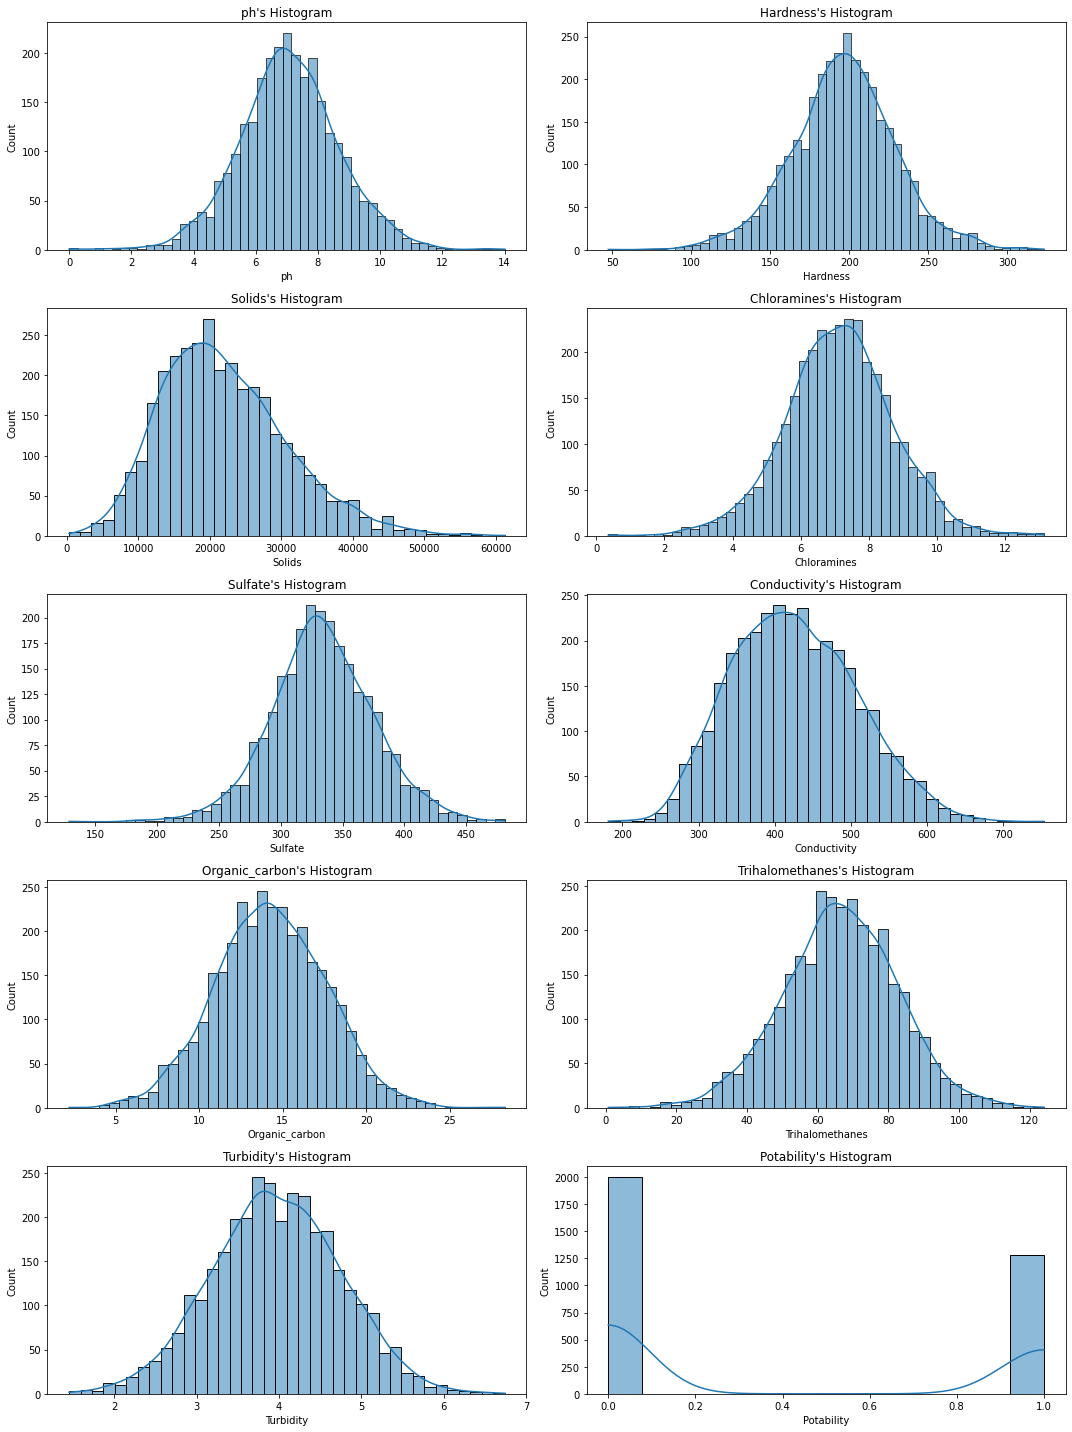

In [35]:
plt.figure(figsize=(15,20))

for n, column in enumerate(df.columns):
    plt.subplot(5, 2, n+1)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"{column}'s Histogram")

plt.tight_layout()
plt.show()

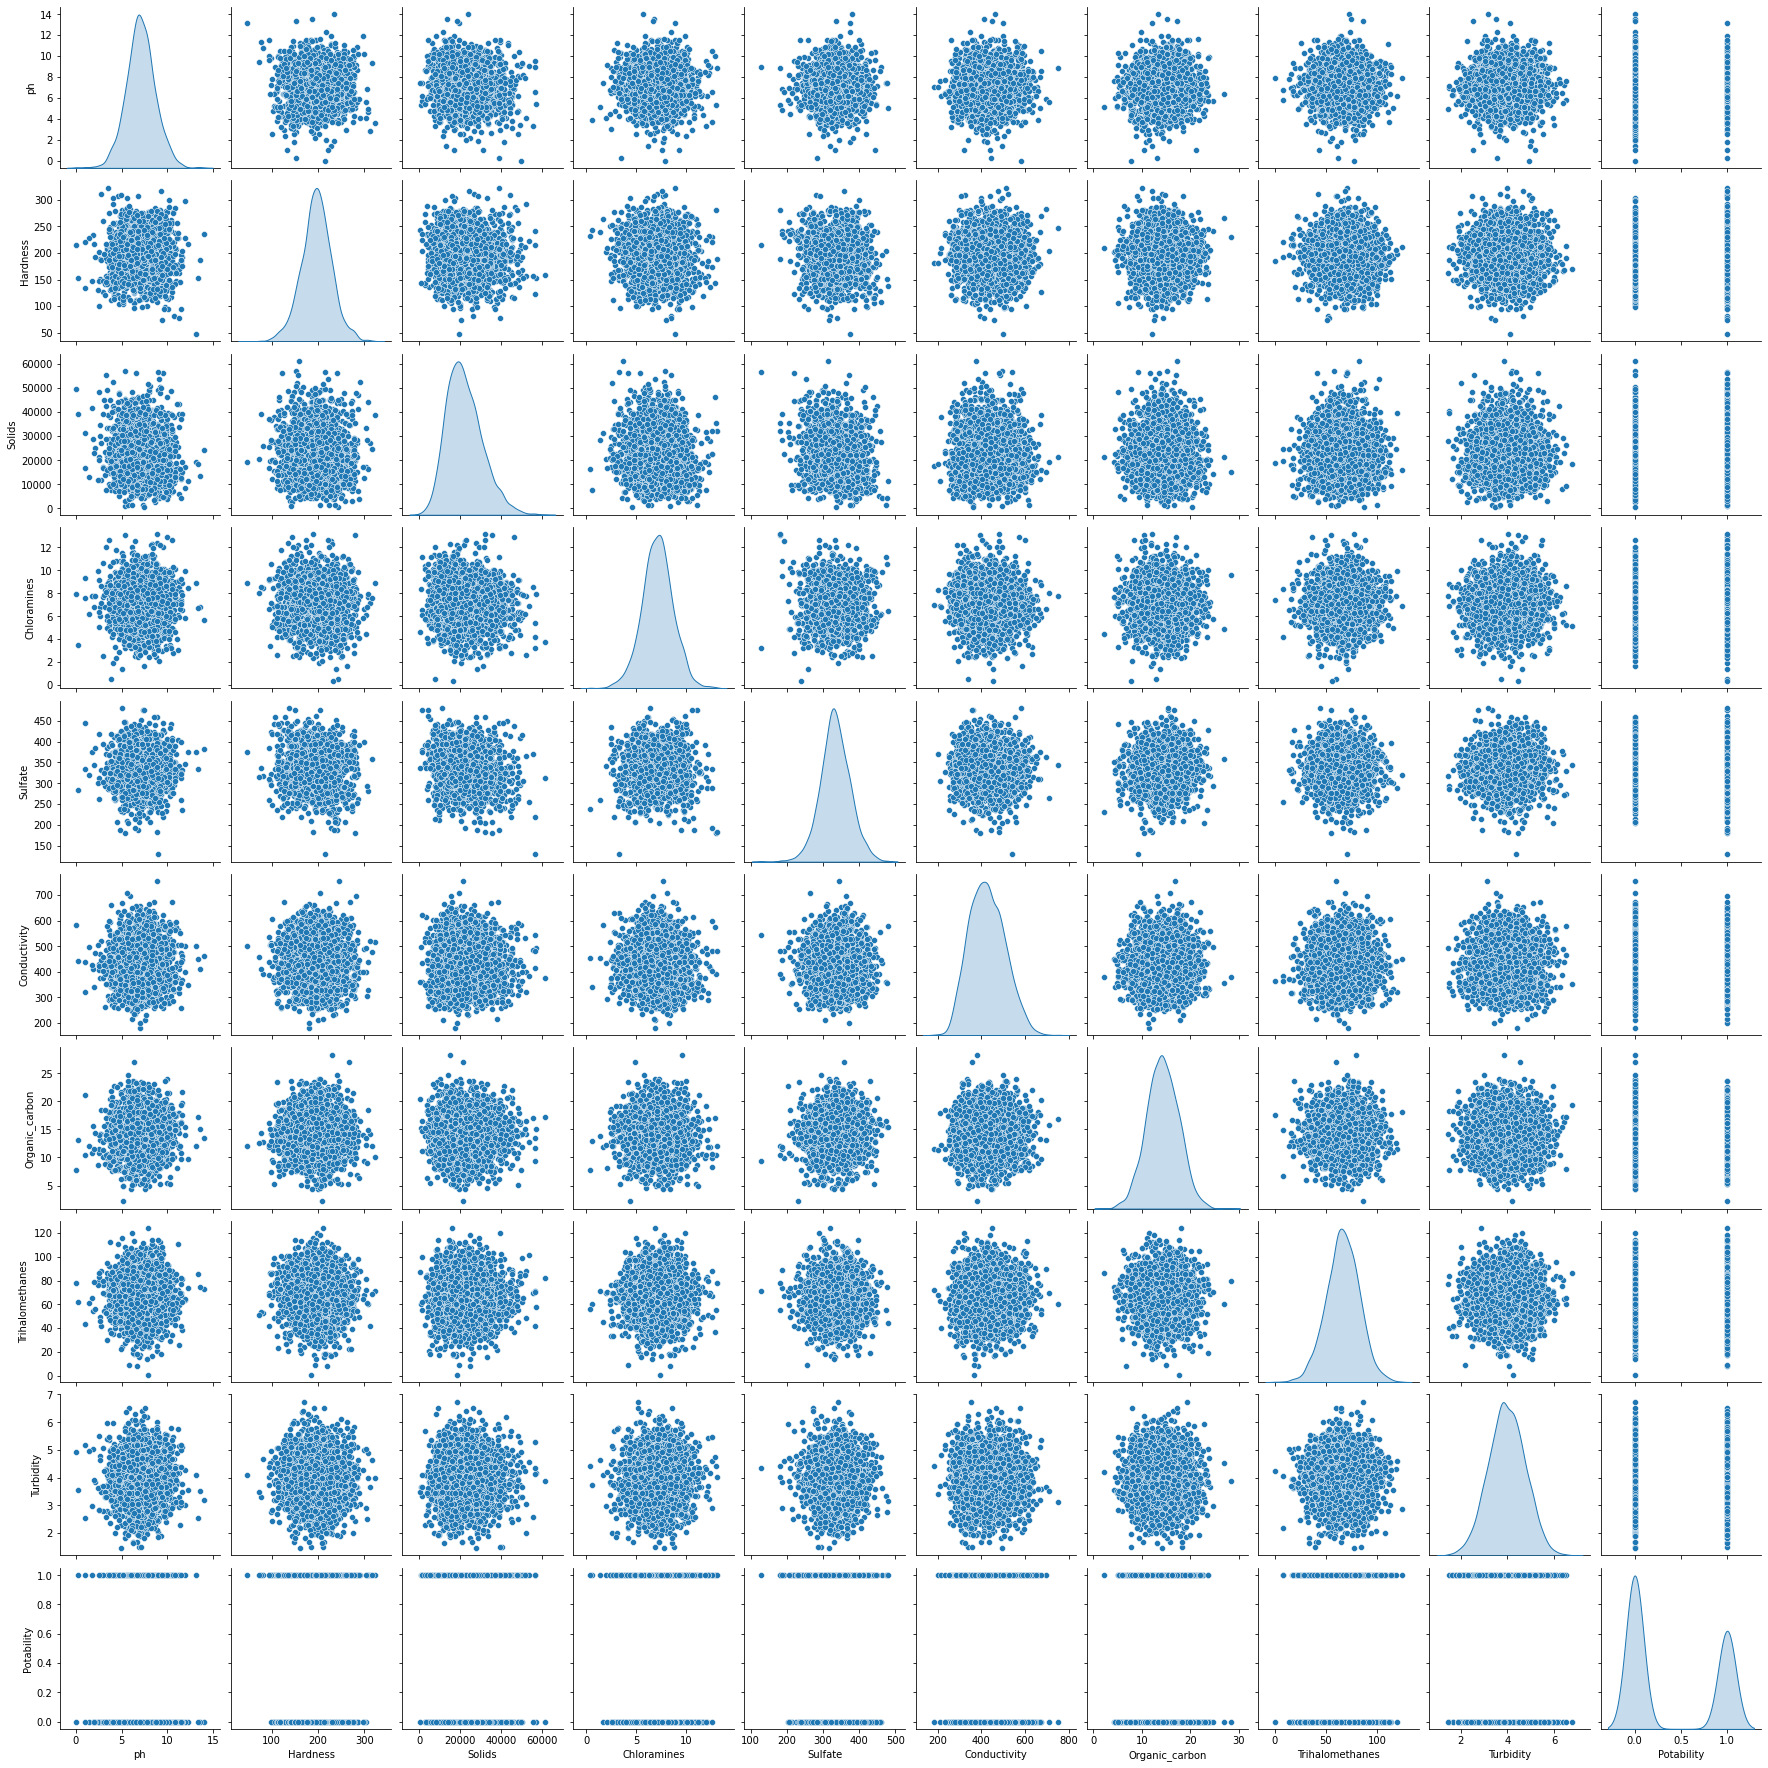

In [36]:
T = df[df.columns]
sns.pairplot(T, diag_kind = 'kde')
plt.show()

It is observed that most parameters follow the normal distribution. This means that the data acquired is representative of real life. We see that the number of rows for potable water is less as compared to that of non potable water. Ideally both should have been equal for better training of the ML model.

#### Prepping Data for Fitting

Checking for missing or null values in data set

In [37]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We find that pH, Sulfate, and Trihalomethanes have null values that must be dealt with.

In [38]:
df = df.dropna().reset_index(drop=True)

Decided to drop the NaN values

In [39]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Now there are no missing values

Descriptive Data Analysis 

Calculating the count, mean, standard deviation etc. of the data 

In [40]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


Scaling data to fit model

In [41]:
# establishing independent and dependent features
X =df.drop(columns = 'Potability')
y = df['Potability']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


#### Splitting data into Train and Test sets 70-30

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 0)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1407, 9)
X_test shape: (604, 9)


#### Modelling

In [43]:
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

models = [lr, svm, rf, knn]
model_name = ["Logistic Regression", "SVM", "Random Forest", "K-Nearest Neighbours"]
train_acc = []
test_acc = []

for model in models:
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    train_acc.append(round(accuracy_score(y_train, y_train_hat)*100, 2))
    test_acc.append(round(accuracy_score(y_test, y_test_hat)*100, 2))

model_accuracy = pd.DataFrame({"Train accuracy %": train_acc, "Test accuracy %": test_acc}, index = model_name)
model_accuracy

,Train accuracy %,Test accuracy %
Logistic Regression,59.70,61.26
SVM,73.77,69.87
Random Forest,100.00,70.20
K-Nearest Neighbours,75.69,65.07


From fitting the machine learning models and subsequently testing the accuracy, we find that the Random Forest Classifier scores the highest.

We can try to increase the accuracy of the Random Forest Classifier by tuning the hyperparameters

In [44]:
parameters = {
    "n_estimators":[5,10,50,100,250,500],
    "max_depth":[2,4,8,16,32,None]
    }

gscv = GridSearchCV(rf, parameters, cv =10)
rf_gscv = gscv.fit(X_train, y_train)


In [48]:
rf_gscv.best_params_

{'max_depth': None, 'n_estimators': 500}

Train the model again with the best parameters

In [49]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 0, max_depth = None)
rf.fit(X_train, y_train)
round(accuracy_score(y_test, rf.predict(X_test))*100,2)


71.52

We see an increase in accuracy by 1.32%

We test the performance of the model

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_true.

In [50]:
print(classification_report(y_test, rf_gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       367
           1       0.73      0.42      0.53       237

    accuracy                           0.71       604
   macro avg       0.72      0.66      0.66       604
weighted avg       0.72      0.71      0.69       604



Function to plot confusion matrix

In [51]:
def plot_confusion_matrix(y,y_predict):
    
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = ".1f"); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not potable', 'potable']); ax.yaxis.set_ticklabels(['not potable', 'potable'])

Random Forest Classifier


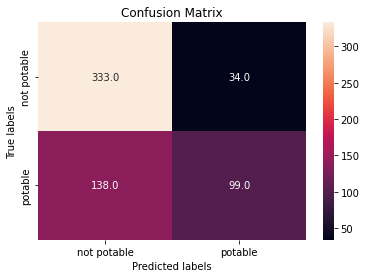

In [52]:
print("Random Forest Classifier")
plot_confusion_matrix(y_test, rf.predict(X_test))

#### Hence, the Random Forest Classifier is chosen to train the ML model that can classify the water body based on its parameters as potable or not with an accuracy of 71.52%

#### In order to further increase the accuracy of the model, we must consider more parameters that can help in determine potability of the water body. 